In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [5]:
df=pd.read_csv("../데이터셋/고객db_전처리2.csv",index_col=0)

In [6]:
df.head(2)

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,주소,거주 지역,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,인천광역시 남동구 구월동 88-10,인천광역시,...,2분기,평일,350,22,35170000,신용카드,오프라인,1,0.002,0.135
2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,광주광역시 서구 치평동 14-7,광주광역시,...,1분기,평일,38,42,85790000,신용카드,오프라인,5,0.508,0.037


In [7]:
# 구매 연도에따른 구매제품 분석

In [8]:
category_df=df[["최근 구매 제품","최근 거래 금액","최근 구매 날짜"]]

In [9]:
category_df

,최근 구매 제품,최근 거래 금액,최근 구매 날짜
연번,,,
1,Avante (CN7 N),35170000,2024-04-04
2,G80 (RG3),85790000,2025-02-10
3,NEXO (FE),69500000,2025-03-10
4,Santa-Fe ™,34920000,2023-05-01
5,G70 (IK),50230000,2023-10-01
...,...,...,...
288,G80 (RG3),86770000,2024-12-20
289,Avante (CN7 N),69510000,2023-08-24
290,NEXO (FE),39890000,2024-01-12


In [10]:
# 연도만 빼기
category_df["최근 구매 날짜"]=category_df["최근 구매 날짜"].str[:4]

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_42375/3678036121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["최근 구매 날짜"]=category_df["최근 구매 날짜"].str[:4]


In [11]:
category_df

,최근 구매 제품,최근 거래 금액,최근 구매 날짜
연번,,,
1,Avante (CN7 N),35170000,2024
2,G80 (RG3),85790000,2025
3,NEXO (FE),69500000,2025
4,Santa-Fe ™,34920000,2023
5,G70 (IK),50230000,2023
...,...,...,...
288,G80 (RG3),86770000,2024
289,Avante (CN7 N),69510000,2023
290,NEXO (FE),39890000,2024


In [12]:
result=category_df.groupby(["최근 구매 날짜","최근 구매 제품"])[["최근 거래 금액"]].count().reset_index()

In [13]:
result=result.rename(columns={"최근 거래 금액":"판매량"})

In [28]:
result

,최근 구매 날짜,최근 구매 제품,판매량
0,2023,Avante (CN7 N),20
1,2023,G70 (IK),27
2,2023,G80 (RG3),16
3,2023,Grandeur (GN7 HEV),3
4,2023,IONIQ (AE EV),2
5,2023,NEXO (FE),22
6,2023,Palisade (LX2),1
7,2023,Santa-Fe (MX5 PHEV),1
8,2023,Santa-Fe ™,19
9,2023,Tucson (NX4 PHEV),1


In [29]:
result['최근 구매 제품'].nunique()

14

In [26]:
result['최근 구매 날짜'].unique()

array(['2023', '2024', '2025'], dtype=object)

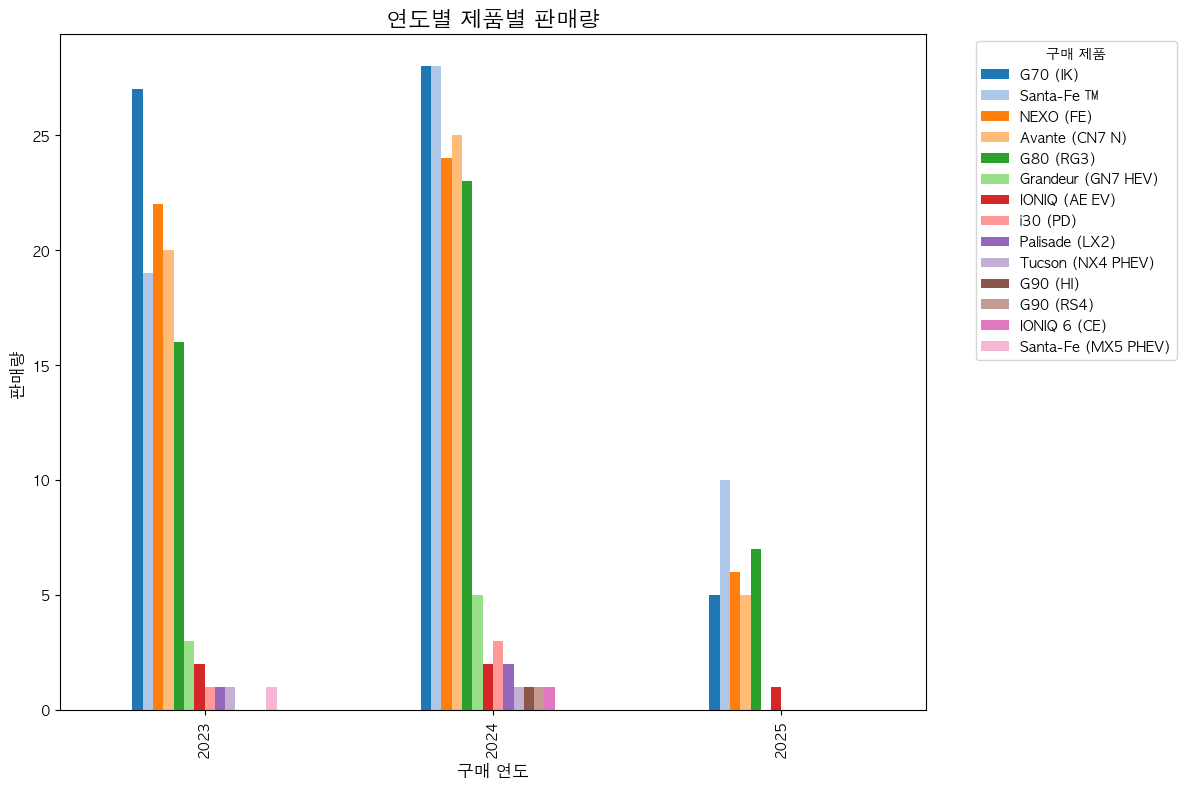

In [ ]:
# 구매 연도별 제품 판매량 합산 (피벗 테이블)
df_pivot = result.pivot_table(index='최근 구매 날짜', columns='최근 구매 제품', values='판매량', fill_value=0)

# 제품별 총 판매량 기준으로 정렬
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# 연도 정렬 (오름차순)
df_pivot = df_pivot.sort_index(ascending=True)

# 14개 색상 설정 (Seaborn의 'tab20'에서 14개 색 추출)
color_list = sb.color_palette("tab20", 14)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=color_list)

# 그래프 제목 및 레이블 설정
ax.set_title('연도별 제품별 판매량', fontsize=16)
ax.set_xlabel('구매 연도', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='구매 제품', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show() 